# Newton's method in $n$ dimensions

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

## Define a function and its Jacobian

In [2]:
def f(xvec):
    x, y = xvec
    return np.array([
        x + 2*y -2,
        x**2 + 4*y**2 - 4
        ])

def Jf(xvec):
    x, y = xvec
    return np.array([
        [1, 2],
        [2*x, 8*y]
        ])

## Plot it!!

<IPython.core.display.Javascript object>


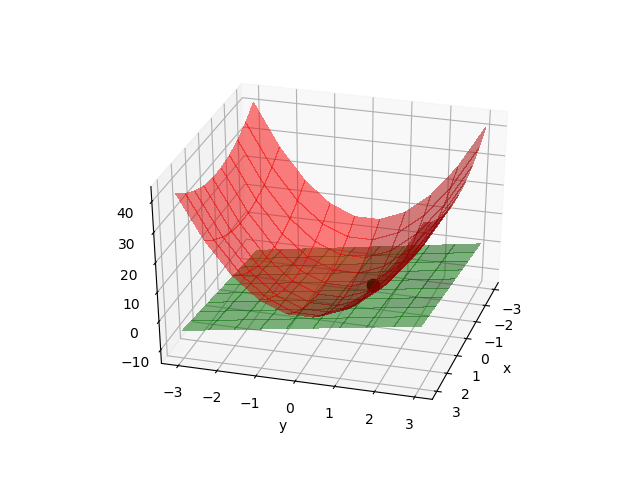

Text(0.5,0,'y')

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

res = 10j
x, y = np.mgrid[-3:3:res,-3:3:res]
f1 = x + 2*y -2
f2 = x**2 + 4*y**2 - 4
ax.plot_surface(x, y, f1, color="green", cstride=1, rstride=1, linewidth=0,antialiased=False, alpha=0.5)
ax.plot_surface(x, y, f2, color="red", cstride=1, rstride=1, linewidth=1, antialiased=False, alpha=0.5)
ax.scatter([0], [1], zs=0, zdir='z',s=80,c='k')
ax.set_xlabel('x')
ax.set_ylabel('y')

Pick an initial guess.

In [4]:
x = np.array([1, 2])

Now implement Newton's method.

In [5]:
for i in range(10):
    s = la.solve(Jf(x), -f(x))
    x = x + s
    print(x)

[-0.83333333  1.41666667]
[-0.18939394  1.09469697]
[-0.01507914  1.00753957]
[ -1.12001278e-04   1.00005600e+00]
[ -6.27144051e-09   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]


Check if that's really a solution:

In [ ]:
f(x)

* What's the cost of one iteration?
* Is there still something like quadratic convergence?

--------------------
Let's keep an error history and check.

In [6]:
xtrue = np.array([0, 1])
errors = []
x = np.array([1, 2])

In [8]:
for i in range(10):
    A = Jf(x)
    s = la.solve(A, f(x))
    x = x - s
    errors.append(la.norm(x-xtrue))
    print(x)

[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]
[  1.50295992e-16   1.00000000e+00]


In [9]:
for e in errors:
    print(e)

0.931694990625
0.211748861506
0.0168589857887
0.000125221235922
7.01168369152e-09
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16
1.50295991741e-16


In [13]:
r = 2
for i in range(len(errors)-1):
    print(errors[i+1]/errors[i]**r)

0.243934688455
0.376001239529
0.440570178174
0.447163497456
3.05705157878
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15
6.65353738591e+15


---
But what if $J_f(x)$ is very expensive to evaluate at every iteration?

We can approximate the Jacobian satisfying $\tilde{J}_f (x_{k+1} - x_k) \cong f(x_{k+1}) - f(x_k)$ 

We can use Broyden's Method to approximate the Jacobian:

In [20]:
#Pick the same initial guess
x = np.array([1, 2])
#initial guess for the jacobian approximate is the actual jacobian
#B = Jf(x) 
B = np.eye(2)
errors = [la.norm(x-xtrue)]
count = 0

while errors[-1] > 1e-9 and count < 100:
    count += 1
    s = - la.solve(B, f(x))    
    B = B + np.outer(f(x + s), s)/ (la.norm(s)**2)
    x = x + s
    print(x)
    errors.append(la.norm(x-xtrue))

[ -2. -11.]
[-2.76673294  3.2730285 ]
[-8.16841144  6.21557888]
[-0.96493506  1.55573338]
[-0.72167052  1.36408963]
[-0.48240631  1.23587267]
[-0.19302185  1.0951122 ]
[-0.02887444  1.01451254]
[  6.33170720e-05   9.99998655e-01]
[  2.48849579e-04   9.99878280e-01]
[  1.44025871e-04   9.99929535e-01]
[ -4.12357557e-07   1.00000020e+00]
[  1.75183516e-09   9.99999999e-01]
[  4.44181584e-12   1.00000000e+00]


In [ ]:
for e in errors:
    print(e)

Do we still have quadratic convergence?

In [19]:
r = 1.618
for i in range(len(errors)-1):
    print(errors[i+1]/errors[i]**r)

0.531790401077
0.301623519578
0.610293516125
0.526274415146
0.641730957788
0.585987142298
0.621781647211


Is it superlinear?

In [ ]:
r = 1.6
for i in range(len(errors)-1):
    print(errors[i+1]/errors[i]**r)